# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
city_data = []

In [8]:
print("Beginning Data Retrieval")
print("-----------------------------")

setCount = 1
recordCount = 1

for i, city in enumerate(cities):
    if(i % 50 == 0 and i > 0):
        setCount += 1
        recordCount = 1
        
    print(f"Processing Record {recordCount} of set {setCount} | {city}")
    recordCount += 1
    response = requests.get(query_url + city).json()
    try:
        city_data.append({'City':city,
                     'Lat':response['coord']['lat'],
                     'Lon':response['coord']['lon'],
                     'Max Temp':response['main']['temp_max'],
                     'Humidity':response['main']['humidity'],
                     'Cloudiness':response['clouds']['all'],
                     'Wind Speed':response['wind']['speed'],
                     'Country':response['sys']['country'],
                     'Date':response['dt']})
    except (KeyError, IndexError):
          print("City not found. Skipping...")   
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | carnarvon
Processing Record 2 of set 1 | cape town
Processing Record 3 of set 1 | zemio
Processing Record 4 of set 1 | hilo
Processing Record 5 of set 1 | barentsburg
City not found. Skipping...
Processing Record 6 of set 1 | nikolskoye
Processing Record 7 of set 1 | nanortalik
Processing Record 8 of set 1 | hithadhoo
Processing Record 9 of set 1 | ribeira grande
Processing Record 10 of set 1 | mataura
Processing Record 11 of set 1 | tuktoyaktuk
Processing Record 12 of set 1 | geraldton
Processing Record 13 of set 1 | ocampo
Processing Record 14 of set 1 | qaanaaq
Processing Record 15 of set 1 | isangel
Processing Record 16 of set 1 | hasaki
Processing Record 17 of set 1 | arlit
Processing Record 18 of set 1 | marystown
Processing Record 19 of set 1 | matara
Processing Record 20 of set 1 | labutta
City not found. Skipping...
Processing Record 21 of set 1 | narsaq
Processing Record 22 of set 1 | severo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
cdata_df = pd.DataFrame(city_data)
cdata_df

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carnarvon,-24.87,113.63,19.00,82,90,8.70,AU,1594961110
1,cape town,-33.93,18.42,8.89,75,0,2.10,ZA,1594961158
2,zemio,5.03,25.14,20.29,96,74,0.13,CF,1594961159
3,hilo,19.73,-155.09,27.00,74,20,2.10,US,1594961159
4,nikolskoye,59.70,30.79,15.56,77,86,4.00,RU,1594961159
...,...,...,...,...,...,...,...,...,...
538,arica,-18.48,-70.30,15.84,79,100,0.53,CL,1594961274
539,buenos aires,-34.61,-58.38,11.00,71,0,3.10,AR,1594961016
540,troitsko-pechorsk,62.71,56.20,22.11,79,100,1.59,RU,1594961275
541,arvin,35.21,-118.83,32.00,27,1,3.10,US,1594961275


In [10]:
cdata_df.to_csv("city_data.csv", encoding="utf-8", index=False)

In [11]:
cdata_df.count()

City          543
Lat           543
Lon           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
hum = cdata_df.loc[cdata_df["Humidity"] > 100, :]
hum

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [13]:
cdata_df.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,19.944401,15.448895,20.021160,71.314917,50.453039,3.386980,1.594961e+09
std,33.343395,87.527097,7.982357,20.478733,38.549832,2.404494,6.156878e+01
min,-54.800000,-175.200000,-11.000000,12.000000,0.000000,0.110000,1.594961e+09
25%,-7.730000,-60.960000,14.760000,59.500000,8.000000,1.700000,1.594961e+09
50%,22.570000,20.040000,20.840000,76.000000,47.000000,2.970000,1.594961e+09
75%,48.715000,89.660000,26.000000,87.000000,90.000000,4.390000,1.594961e+09
max,78.220000,179.320000,40.070000,100.000000,100.000000,15.540000,1.594961e+09


In [14]:
#  Get the indices of cities that have humidity over 100%.


In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [16]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

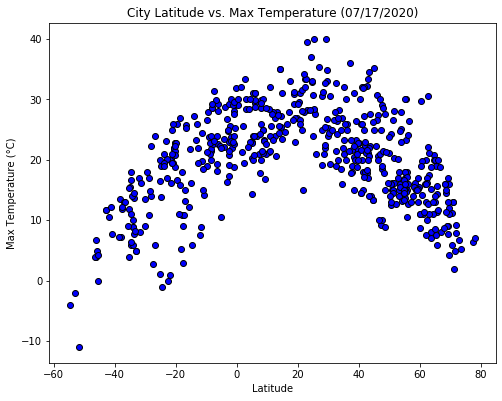

In [19]:
city_lat = cdata_df["Lat"]
city_temp = cdata_df["Max Temp"]

plt.figure(figsize=(8,6.25))
plt.scatter(city_lat, city_temp, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (07/17/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.savefig("citylat_vs_maxtemp.png")
plt.show()

City latitude vs Max Temperature scatter plot shows there is a bell curve distribution between Southern-most & Northern-most latitudes and temperature. However, the peak of the distribution is not the equator, but around °20 lat, in other words, as city latitudes became further distributed north/ south from °20 lat, outside a couple outliers, the temperature dipped lower.

## Latitude vs. Humidity Plot

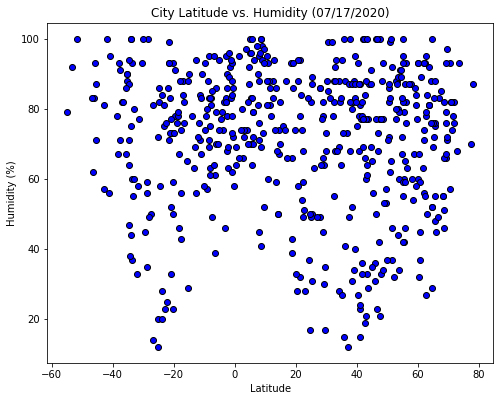

In [23]:
city_lat = cdata_df["Lat"]
city_hum = cdata_df["Humidity"]

plt.figure(figsize=(8,6.25))
plt.scatter(city_lat, city_hum, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Humidity (07/17/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("citylat_vs_humidity.png")
plt.show()

City Latitude vs Humidity shows a relatively distributed spread, with no distinct relationship, but less humidity variability at the extreme latitude poles.

## Latitude vs. Cloudiness Plot

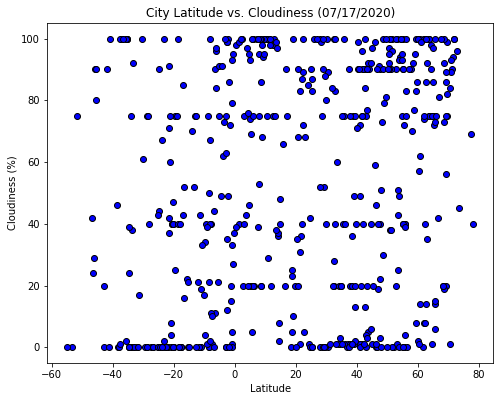

In [24]:
city_lat = cdata_df["Lat"]
city_cloud = cdata_df["Cloudiness"]

plt.figure(figsize=(8,6.25))
plt.scatter(city_lat, city_cloud, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (07/17/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("citylat_vs_cloudiness.png")
plt.show()

City latitude vs cloudiness showed interesting distributions across certain percentages of cloudiness throughout the latitudes.

## Latitude vs. Wind Speed Plot

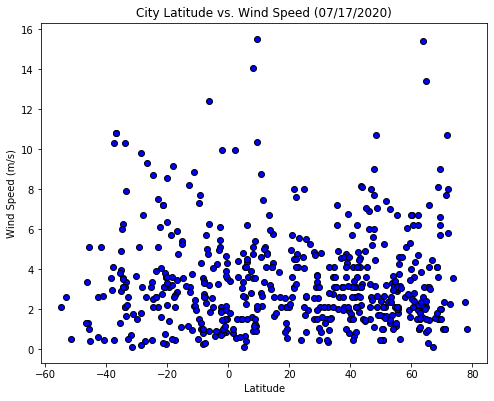

In [25]:
city_lat = cdata_df["Lat"]
city_wspd = cdata_df["Wind Speed"]

plt.figure(figsize=(8,6.25))
plt.scatter(city_lat, city_wspd, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (07/17/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.savefig("citylat_vs_windspeed.png")
plt.show()

City Latitude vs Wind Speed showed a distribution more concentrated within 6 m/s throughout the latitudes. 

## Linear Regression

In [26]:
# OPTIONAL: Create a function to create Linear Regression plots

In [27]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

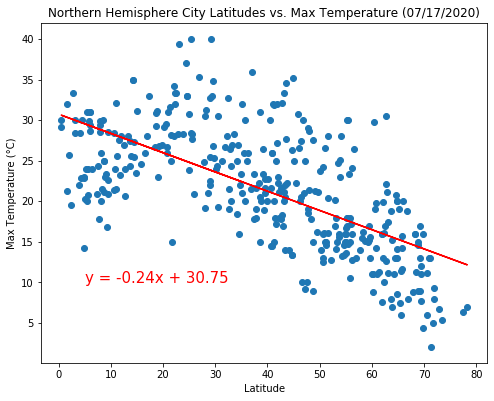

The r-squared is: -0.651


In [28]:
nh_df = cdata_df.loc[cdata_df["Lat"] >= 0]
nh_lat = nh_df["Lat"]
nh_mtemp = nh_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_mtemp)
regress_values = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6.25))
plt.scatter(nh_lat, nh_mtemp)
plt.plot(nh_lat,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitudes vs. Max Temperature (07/17/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.savefig("nhcitylat_vs_maxtemp.png")
plt.show()

print(f"The r-squared is: {rvalue:.3f}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

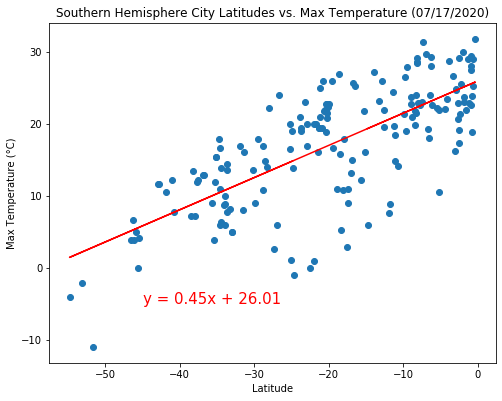

The r-squared is: 0.733


In [33]:
sh_df = cdata_df.loc[cdata_df["Lat"] < 0]
sh_lat = sh_df["Lat"]
sh_mtemp = sh_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_mtemp)
regress_values = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6.25))
plt.scatter(sh_lat, sh_mtemp)
plt.plot(sh_lat,regress_values,"r-")
plt.annotate(line_eq,(-45,-5),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitudes vs. Max Temperature (07/17/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.savefig("shcitylat_vs_maxtemp.png")
plt.show()

print(f"The r-squared is: {rvalue:.3f}")

Northern hemisphere showed a negative regression/ relationship between latitude & max temperature, while the southern hemisphere showed a positive regression. This tells us that in the northern latitudes, the further you got from the equator, the temperature became colder (closer to °0 C); whereas, in the southern latitudes,  the closer you got to the equator, the temperature became warmer (climbed higher from °0 C).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

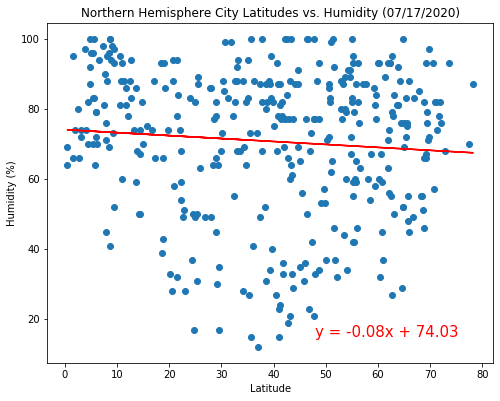

The r-squared is: -0.082


In [34]:
nh_df = cdata_df.loc[cdata_df["Lat"] >= 0]
nh_lat = nh_df["Lat"]
nh_hum = nh_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_hum)
regress_values = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6.25))
plt.scatter(nh_lat, nh_hum)
plt.plot(nh_lat,regress_values,"r-")
plt.annotate(line_eq,(48,15),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitudes vs. Humidity (07/17/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("nhcitylat_vs_humidity.png")
plt.show()

print(f"The r-squared is: {rvalue:.3f}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

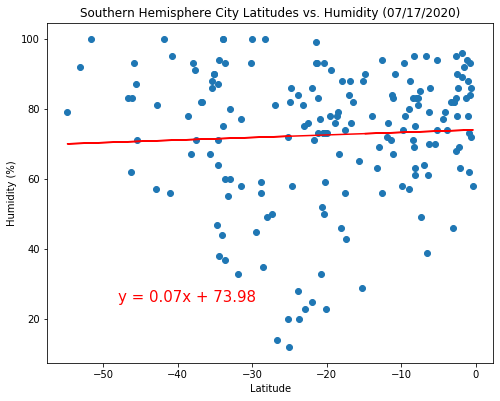

The r-squared is: 0.051


In [35]:
sh_df = cdata_df.loc[cdata_df["Lat"] < 0]
sh_lat = sh_df["Lat"]
sh_hum = sh_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_hum)
regress_values = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6.25))
plt.scatter(sh_lat, sh_hum)
plt.plot(sh_lat,regress_values,"r-")
plt.annotate(line_eq,(-48,25),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitudes vs. Humidity (07/17/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("shcitylat_vs_humidity.png")
plt.show()

print(f"The r-squared is: {rvalue:.3f}")

When comparing the hemispheres and humidity, there is a slight positive relationship between humidity in the southern hemisphere, meaning as the cities got closer to the equator, it got slightly more humid... but it was a very loose relationship. Northern hemisphere had a slightly negative relationship, as the latitudes increased, percentage humidity decreased slightly, again loose relationship. Climate change doesn't help with humidity, but that is an outside factor not computed in this model.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

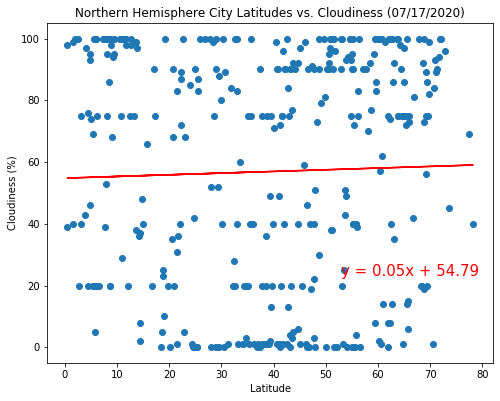

The r-squared is: 0.029


In [45]:
nh_df = cdata_df.loc[cdata_df["Lat"] >= 0]
nh_lat = nh_df["Lat"]
nh_cloud = nh_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_cloud)
regress_values = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6.25))
plt.scatter(nh_lat, nh_cloud)
plt.plot(nh_lat,regress_values,"r-")
plt.annotate(line_eq,(53,23),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitudes vs. Cloudiness (07/17/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("nhcitylat_vs_cloudiness.png")
plt.show()

print(f"The r-squared is: {rvalue:.3f}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

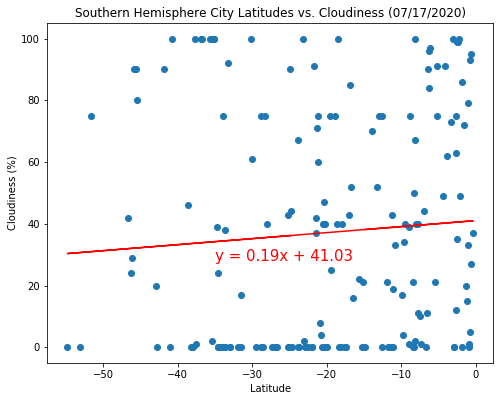

The r-squared is: 0.072


In [39]:
sh_df = cdata_df.loc[cdata_df["Lat"] < 0]
sh_lat = sh_df["Lat"]
sh_cloud = sh_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_cloud)
regress_values = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6.25))
plt.scatter(sh_lat, sh_cloud)
plt.plot(sh_lat,regress_values,"r-")
plt.annotate(line_eq,(-35,28),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitudes vs. Cloudiness (07/17/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("shcitylat_vs_cloudiness.png")
plt.show()

print(f"The r-squared is: {rvalue:.3f}")

For the hemispheres vs cloudiness, the most visible relationship for this, is in the southern hemisphere, where there was a slight positive relationship between latitude and cloudiness percentage; meaning, as latitudes got closer to 0 (equator), cloudiness percentage increased. The northern hemisphere showed less of a relationship.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

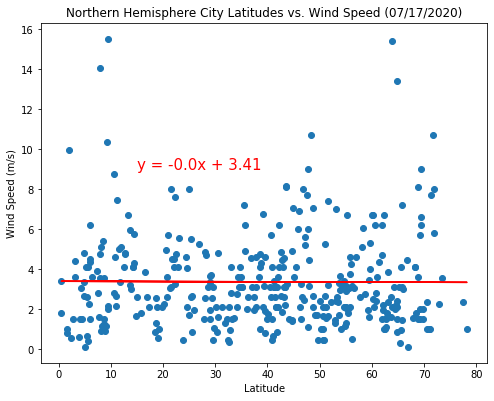

The r-squared is: -0.006


In [46]:
nh_df = cdata_df.loc[cdata_df["Lat"] >= 0]
nh_lat = nh_df["Lat"]
nh_wspd = nh_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_wspd)
regress_values = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6.25))
plt.scatter(nh_lat, nh_wspd)
plt.plot(nh_lat,regress_values,"r-")
plt.annotate(line_eq,(15,9),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitudes vs. Wind Speed (07/17/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.savefig("nhcitylat_vs_windspeed.png")
plt.show()

print(f"The r-squared is: {rvalue:.3f}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

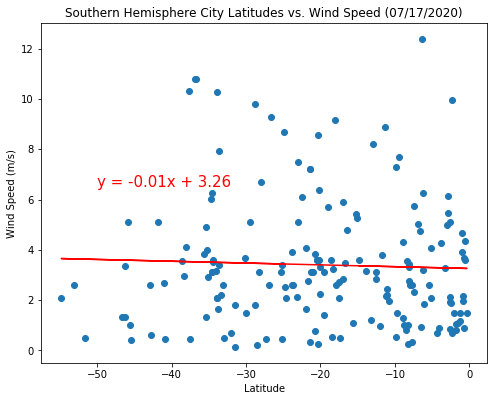

The r-squared is: -0.039


In [44]:
sh_df = cdata_df.loc[cdata_df["Lat"] < 0]
sh_lat = sh_df["Lat"]
sh_wspd = sh_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_wspd)
regress_values = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6.25))
plt.scatter(sh_lat, sh_wspd)
plt.plot(sh_lat,regress_values,"r-")
plt.annotate(line_eq,(-50,6.5),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitudes vs. Wind Speed (07/17/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.savefig("shcitylat_vs_windspeed.png")
plt.show()

print(f"The r-squared is: {rvalue:.3f}")

Hemispheres and wind speed had a (barely) more visible relationship in the southern hemisphere; it was a negative relationship, meaning as latitude increased (towards the equator), wind speed supposedly decreased... this is not clearly visible in the scatter plot. In the northern hemisphere, with the current sample of cities, a relationship on this scatter plot was even less clearly defined, regression was basically a stable flat-line, which doesn't suggest a clear relationship between latitudes & wind speed.